<div style="background-color:#d0e2ff; padding:16px; border-radius:8px;">

### TTP Foundation | Mini-Project Assignment

<p style="color:red; font-weight:bold;">
Submission is MANDATORY to receive Certification
</p>

<b>Instructions</b>

- Complete <b>all assignments</b> covered in this module
- Implement all strategies in <b>different Jupyter Notebooks (.ipynb)</b>
- Ensure all code cells execute without errors
- Include plots, outputs, and performance metrics for each assignment
- Name the notebook files using <b>your fullname_1, fullname_2...</b> (for example: <b>rahul_desai_1.ipynb</b>)
- Send all the completed <b>.ipynb files in a zip folder via email</b> before <b>20 January, 2026</b>

</div>

<div style="background-color:#e8f2ff; padding:16px; border-radius:8px;">

### Assignment 15A: Trend Strength (Stocks)

<b>Assignment Rules</b>

- Compute <b>200-period moving average</b>
- Compute <b>20-period moving average</b>

- <b>Go Long</b> when the following conditions are satisfied:
  - 20 MA is above 200 MA
    
- <b>Exit</b> when the following conditions reverse:
  - 20 MA is below 200 MA

- Apply the strategy on stocks
- Long-only strategy (no short positions)
- Avoid look-ahead bias

<b>Output Requirements</b>

- Plot <b>price chart</b>, <b>200 MA</b>, <b>20 MA</b>, and <b>position</b>
- Print <b>cumulative asset returns</b> and <b>cumulative strategy returns</b>
- Plot <b>cumulative asset vs strategy returns</b>
- Use <b>QuantStats</b> to generate performance metrics

</div>

In [6]:
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
import quantstats as qs
import warnings
warnings.filterwarnings("ignore")


In [10]:
start_date = "2018-01-01"
end_date = "2024-12-31"
df = yf.download("LT.NS", start_date, end_date)

df.index = pd.to_datetime(df.index)

[*********************100%***********************]  1 of 1 completed


In [11]:
df["MA20"] = df["Close"].rolling(20).mean()
df["MA200"] = df["Close"].rolling(200).mean()

In [12]:
df["Signal"] = 0
df.loc[df["MA20"] > df["MA200"], "Signal"] = 1

In [13]:
df["Position"] = df["Signal"].shift(1)
df["Position"].fillna(0, inplace=True)

In [14]:
df["Asset_Return"] = df["Close"].pct_change()

df["Strategy_Return"] = df["Position"] * df["Asset_Return"]

In [15]:
df["Cum_Asset_Return"] = (1 + df["Asset_Return"]).cumprod()
df["Cum_Strategy_Return"] = (1 + df["Strategy_Return"]).cumprod()

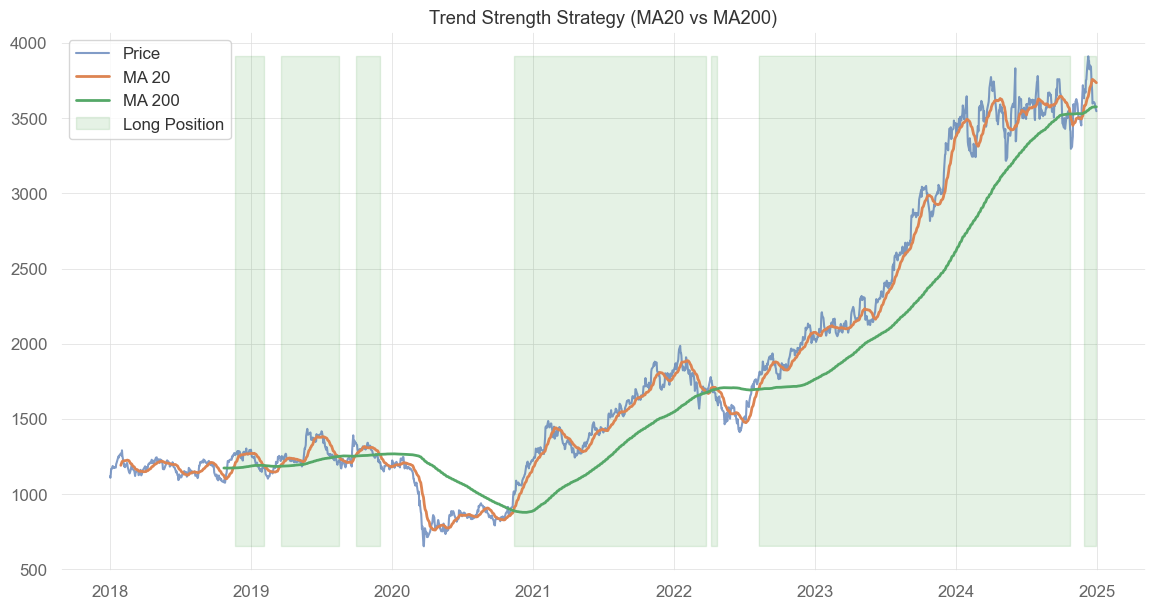

In [16]:
plt.figure(figsize=(14,7))
plt.plot(df["Close"], label="Price", alpha=0.7)
plt.plot(df["MA20"], label="MA 20", linewidth=2)
plt.plot(df["MA200"], label="MA 200", linewidth=2)

plt.fill_between(
    df.index,
    df["Close"].min(),
    df["Close"].max(),
    where=df["Position"] == 1,
    color="green",
    alpha=0.1,
    label="Long Position"
)

plt.title("Trend Strength Strategy (MA20 vs MA200)")
plt.legend()
plt.show()

In [18]:
print("Cumulative Asset Return:", df["Cum_Asset_Return"].iloc[-1])
print("Cumulative Strategy Return:", df["Cum_Strategy_Return"].iloc[-1])

Cumulative Asset Return: 3.1703528978790216
Cumulative Strategy Return: 2.341018064170992


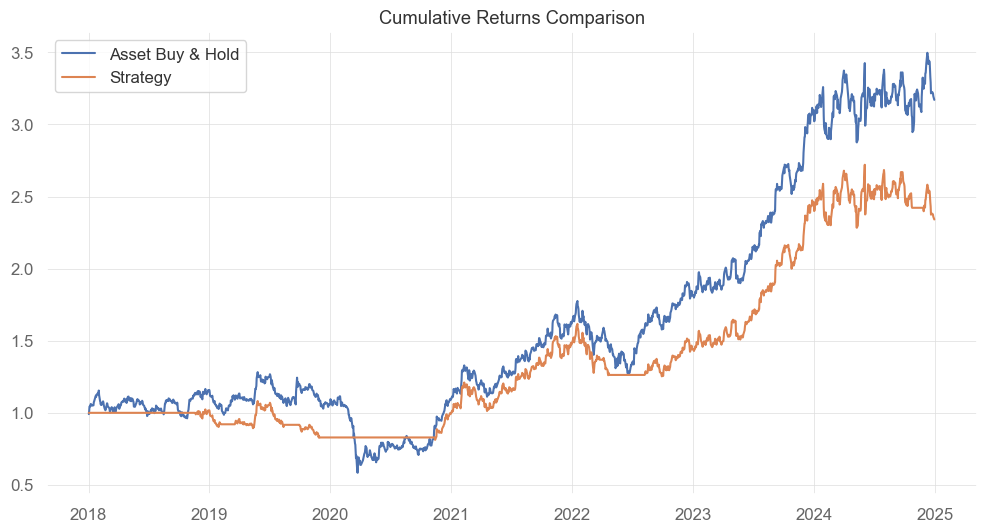

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df["Cum_Asset_Return"], label="Asset Buy & Hold")
plt.plot(df["Cum_Strategy_Return"], label="Strategy")
plt.title("Cumulative Returns Comparison")
plt.legend()
plt.show()

In [20]:
strategy_returns = df["Strategy_Return"].dropna()
asset_returns = df["Asset_Return"].dropna()

                           Strategy
-------------------------  ----------
Start Period               2018-01-02
End Period                 2024-12-30
Risk-Free Rate             0.0%
Time in Market             65.0%

Cumulative Return          134.1%
CAGR﹪                     13.23%

Sharpe                     0.74
Prob. Sharpe Ratio         97.32%
Smart Sharpe               0.74
Sortino                    1.1
Smart Sortino              1.09
Sortino/√2                 0.78
Smart Sortino/√2           0.77
Omega                      1.17

Max Drawdown               -24.9%
Max DD Date                2020-11-13
Max DD Period Start        2019-05-28
Max DD Period End          2021-01-29
Longest DD Days            613
Volatility (ann.)          19.19%
Calmar                     0.53
Skew                       -0.21
Kurtosis                   11.55

Expected Daily %           0.05%
Expected Monthly %         1.02%
Expected Yearly %          12.92%
Kelly Criterion            7.62%
Risk of Ruin 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2019-05-28,2020-11-13,2021-01-29,613,-24.904625,-23.231285
2,2022-01-18,2022-09-29,2023-04-27,465,-22.515761,-21.664309
3,2021-02-10,2021-04-19,2021-07-14,155,-16.342675,-14.998873
4,2024-04-02,2024-05-10,2024-05-31,60,-14.761595,-14.657374
5,2024-06-04,2024-12-30,2024-12-30,210,-13.941224,-12.725705


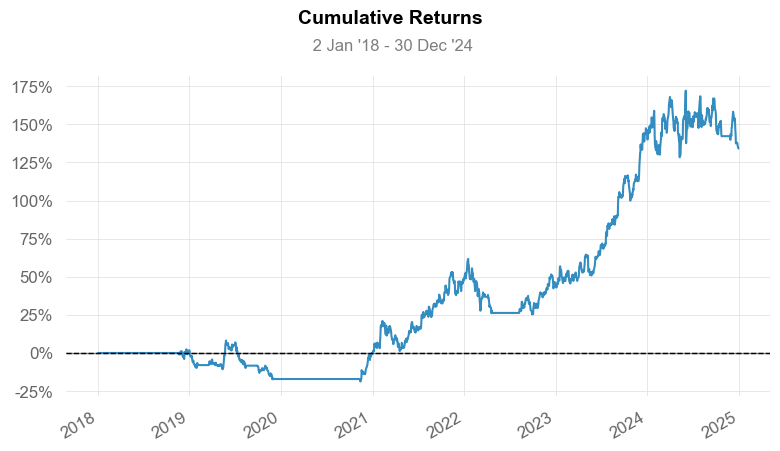

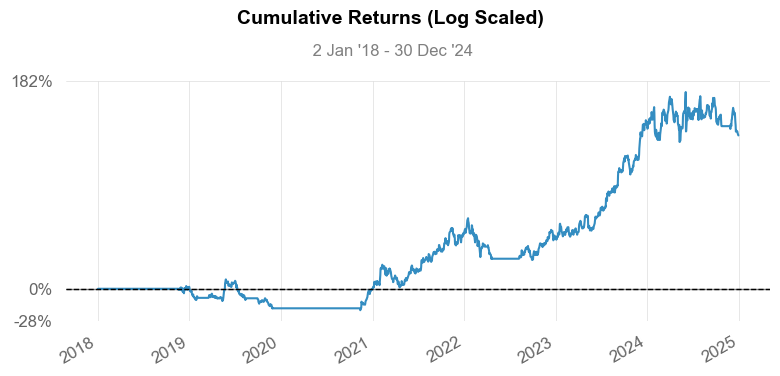

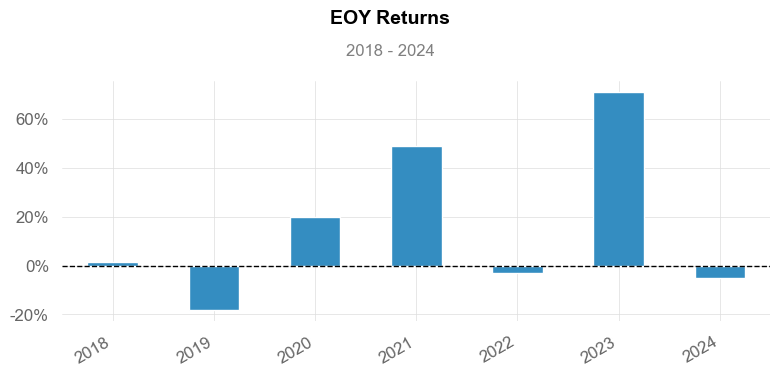

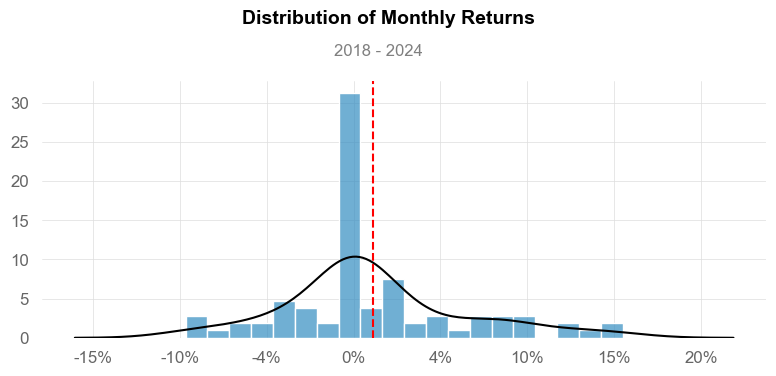

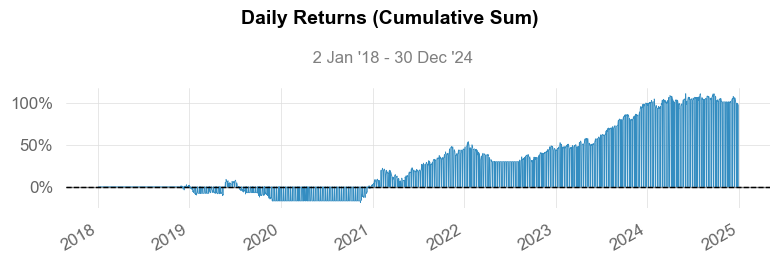

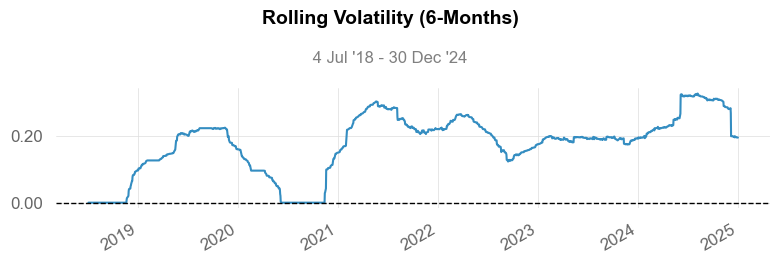

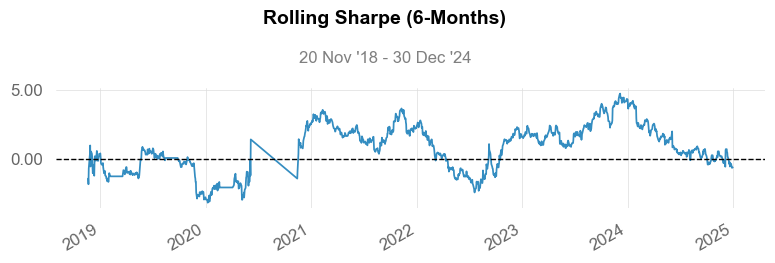

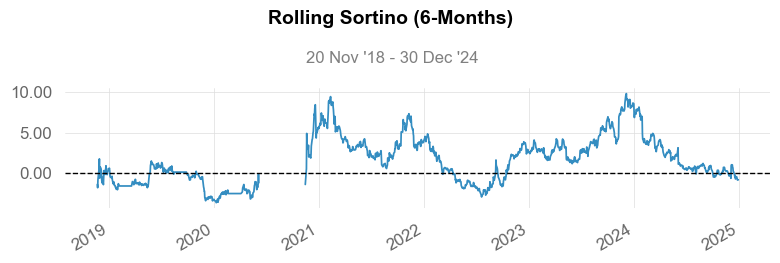

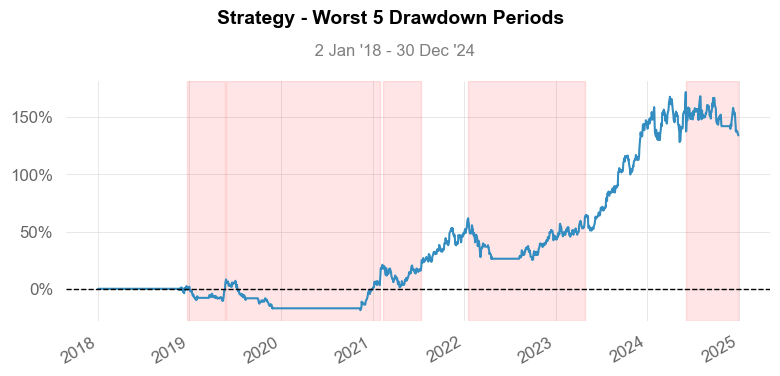

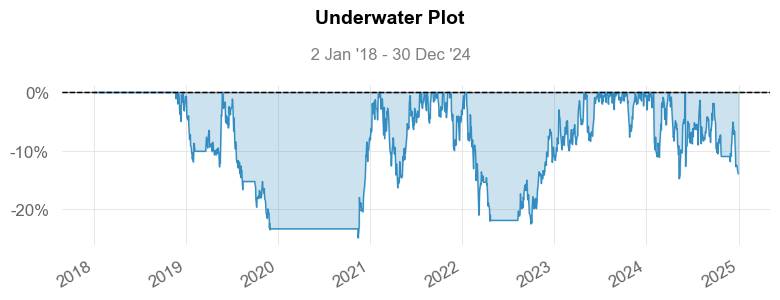

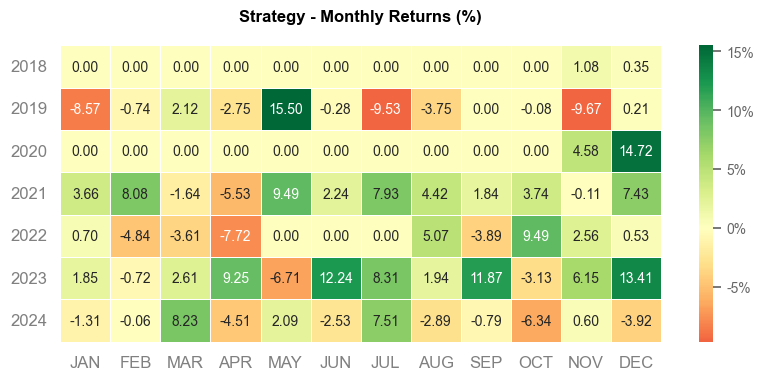

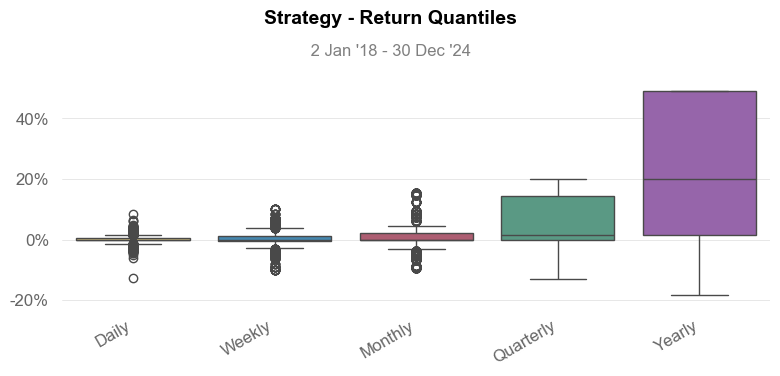

In [21]:
qs.reports.full(strategy_returns)

<div style="background-color:#e8f2ff; padding:16px; border-radius:8px;">

### Assignment 15B: Trend + Momentum Filter (Stocks)

<b>Assignment Rules</b>

- Compute <b>50-period EMA</b>
- Compute <b>200-period EMA</b>
- Compute <b>RSI (14)</b>

- <b>Go Long</b> when all of the following conditions are satisfied:
  - 50 EMA is greater than 200 EMA
  - RSI (14) is greater than 40

- <b>Exit</b> when either conditions fails:
  - 50 EMA goes below 200EMA or RSI goes below 40
     
    
- Long-only strategy (no short positions)
- Avoid look-ahead bias

<b>Output Requirements</b>

- Plot <b>price chart</b>, <b>moving averages</b>, <b>RSI</b>, and <b>position</b>
- Print <b>cumulative asset returns</b> and <b>cumulative strategy returns</b>
- Plot <b>cumulative asset vs strategy returns</b>
- Use <b>QuantStats</b> to generate performance metrics

</div>

In [22]:
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
import quantstats as qs
import warnings
warnings.filterwarnings("ignore")

In [23]:
start_date = "2018-01-01"
end_date = "2024-12-31"
df = yf.download("LT.NS", start_date, end_date)

df.index = pd.to_datetime(df.index)

[*********************100%***********************]  1 of 1 completed


In [24]:
df["EMA50"] = df["Close"].ewm(span=50, adjust=False).mean()
df["EMA200"] = df["Close"].ewm(span=200, adjust=False).mean()

In [28]:
delta = df["Close"].diff()

gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()

rs = avg_gain / avg_loss
df["RSI"] = 100 - (100 / (1 + rs))

In [29]:
df["Signal"] = 0

df.loc[
    (df["EMA50"] > df["EMA200"]) &
    (df["RSI"] > 40),
    "Signal"
] = 1

In [30]:
df["Position"] = df["Signal"].shift(1)
df["Position"].fillna(0, inplace=True)

In [31]:
df["Asset_Return"] = df["Close"].pct_change()

df["Strategy_Return"] = df["Position"] * df["Asset_Return"]

In [32]:
df["Cum_Asset_Return"] = (1 + df["Asset_Return"]).cumprod()
df["Cum_Strategy_Return"] = (1 + df["Strategy_Return"]).cumprod()

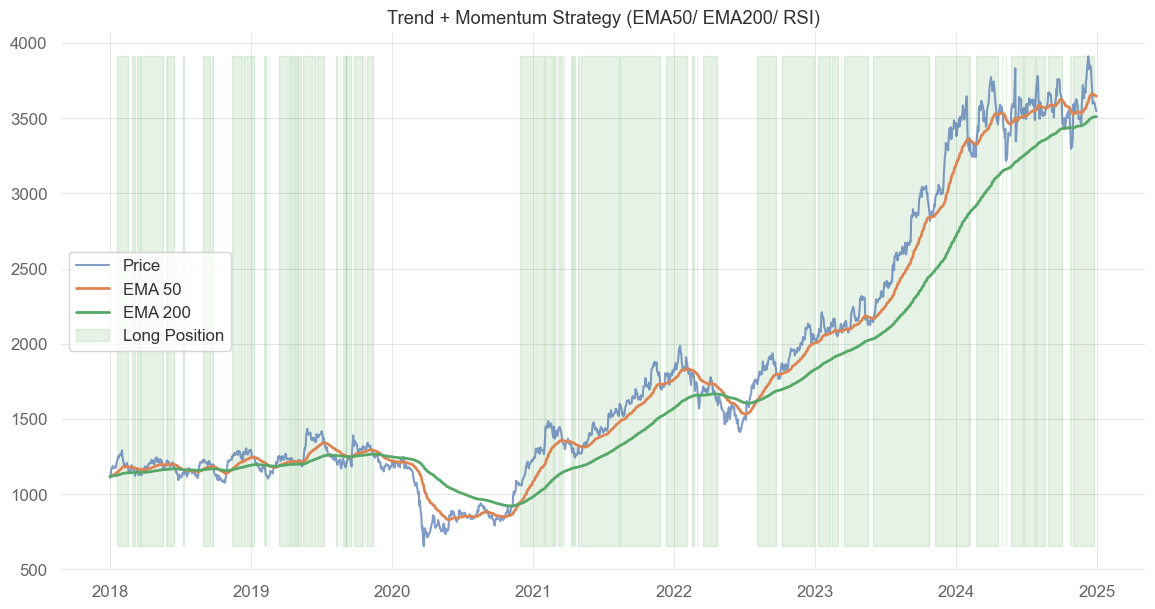

In [33]:
plt.figure(figsize=(14,7))

plt.plot(df["Close"], label="Price", alpha=0.7)
plt.plot(df["EMA50"], label="EMA 50", linewidth=2)
plt.plot(df["EMA200"], label="EMA 200", linewidth=2)

plt.fill_between(
    df.index,
    df["Close"].min(),
    df["Close"].max(),
    where=df["Position"] == 1,
    color="green",
    alpha=0.1,
    label="Long Position"
)

plt.title("Trend + Momentum Strategy (EMA50/ EMA200/ RSI)")
plt.legend()
plt.show()

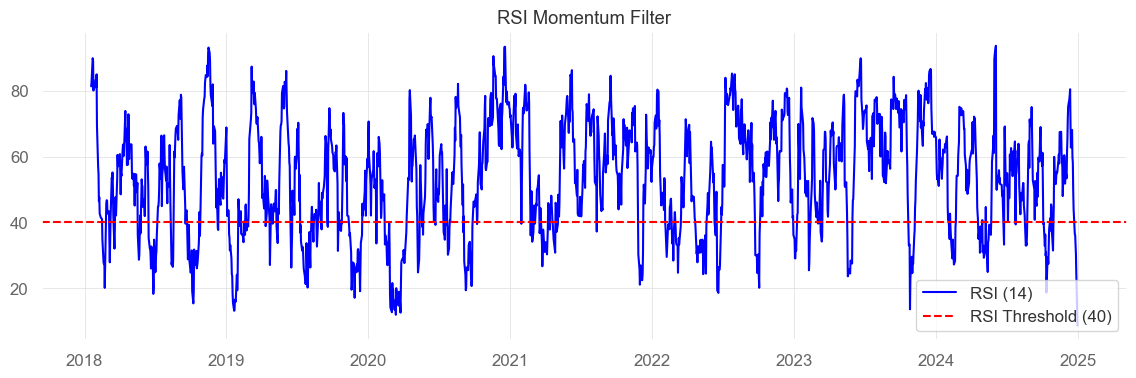

In [36]:
plt.figure(figsize=(14,4))

plt.plot(df["RSI"], label="RSI (14)", color="blue")
plt.axhline(40, color="red", linestyle="--", label="RSI Threshold (40)")

plt.title("RSI Momentum Filter")
plt.legend()
plt.show()

In [37]:
print("Cumulative Asset Return:", df["Cum_Asset_Return"].iloc[-1])
print("Cumulative Strategy Return:", df["Cum_Strategy_Return"].iloc[-1])

Cumulative Asset Return: 3.1703528978790216
Cumulative Strategy Return: 1.4246762730544453


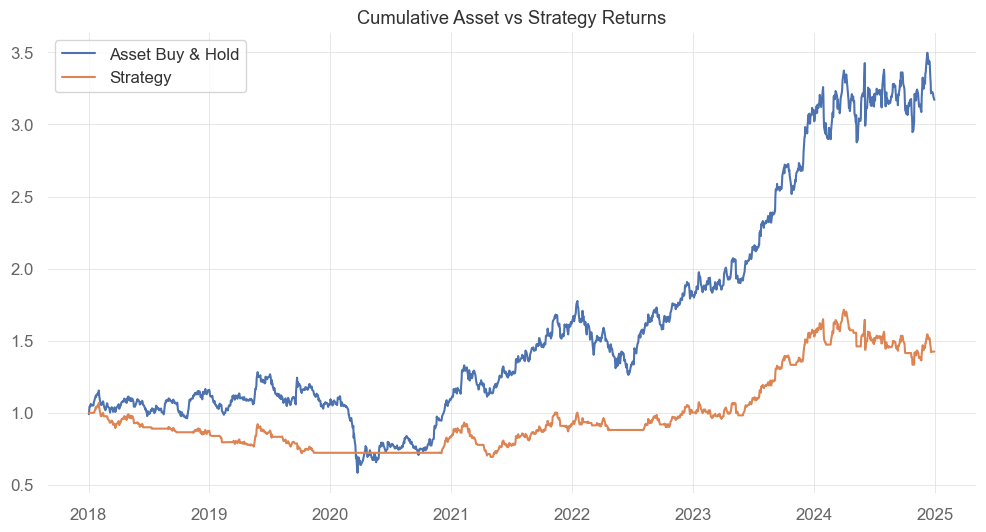

In [38]:
plt.figure(figsize=(12,6))
plt.plot(df["Cum_Asset_Return"], label="Asset Buy & Hold")
plt.plot(df["Cum_Strategy_Return"], label="Strategy")
plt.title("Cumulative Asset vs Strategy Returns")
plt.legend()
plt.show()

In [ ]:
strategy_returns = df["Strategy_Return"].dropna()

                           Strategy
-------------------------  ----------
Start Period               2018-01-02
End Period                 2024-12-30
Risk-Free Rate             0.0%
Time in Market             65.0%

Cumulative Return          134.1%
CAGR﹪                     13.23%

Sharpe                     0.74
Prob. Sharpe Ratio         97.32%
Smart Sharpe               0.74
Sortino                    1.1
Smart Sortino              1.09
Sortino/√2                 0.78
Smart Sortino/√2           0.77
Omega                      1.17

Max Drawdown               -24.9%
Max DD Date                2020-11-13
Max DD Period Start        2019-05-28
Max DD Period End          2021-01-29
Longest DD Days            613
Volatility (ann.)          19.19%
Calmar                     0.53
Skew                       -0.21
Kurtosis                   11.55

Expected Daily %           0.05%
Expected Monthly %         1.02%
Expected Yearly %          12.92%
Kelly Criterion            7.62%
Risk of Ruin 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2019-05-28,2020-11-13,2021-01-29,613,-24.904625,-23.231285
2,2022-01-18,2022-09-29,2023-04-27,465,-22.515761,-21.664309
3,2021-02-10,2021-04-19,2021-07-14,155,-16.342675,-14.998873
4,2024-04-02,2024-05-10,2024-05-31,60,-14.761595,-14.657374
5,2024-06-04,2024-12-30,2024-12-30,210,-13.941224,-12.725705


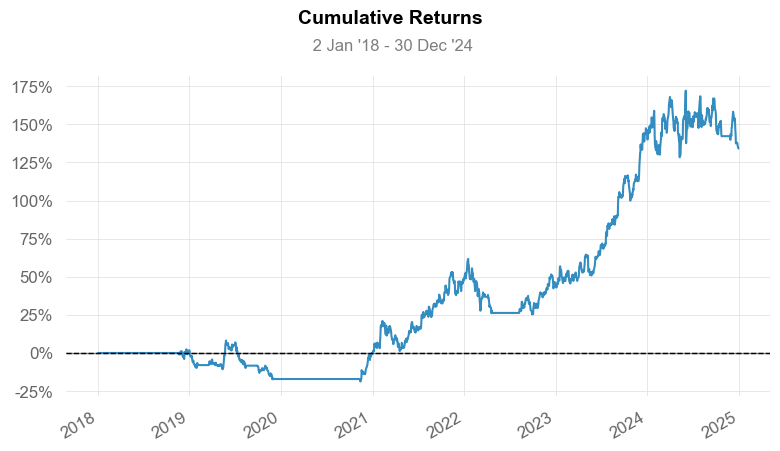

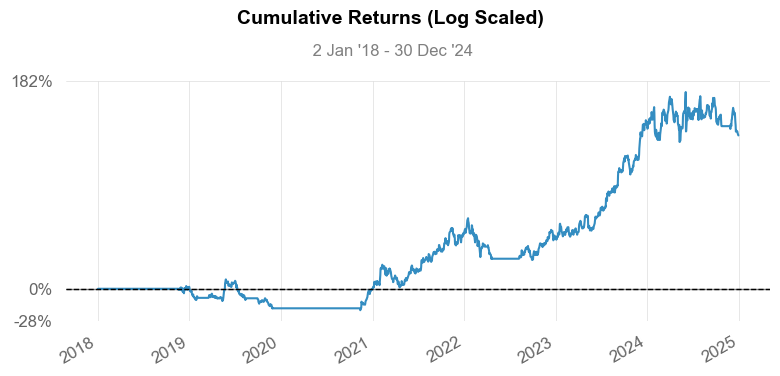

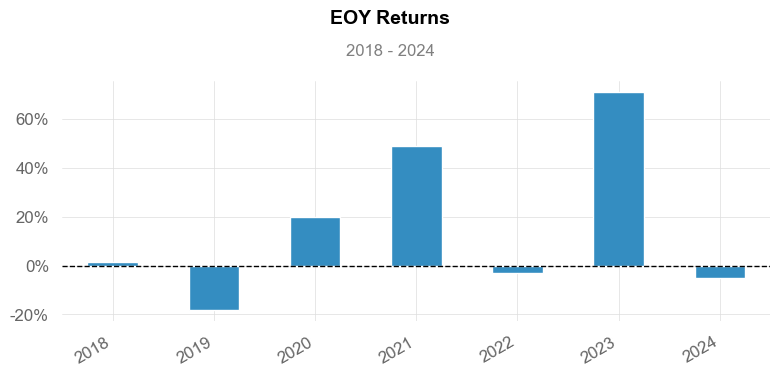

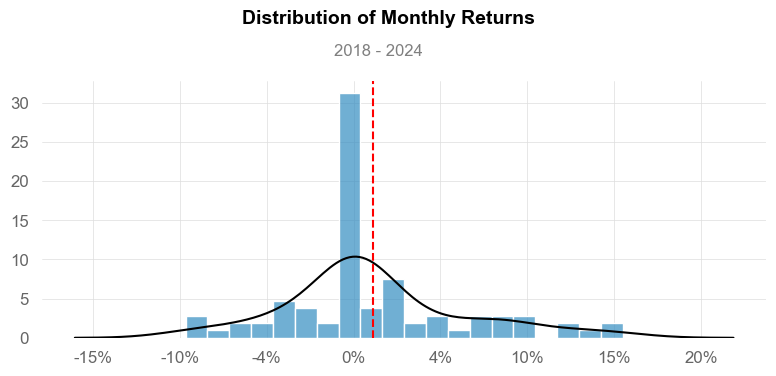

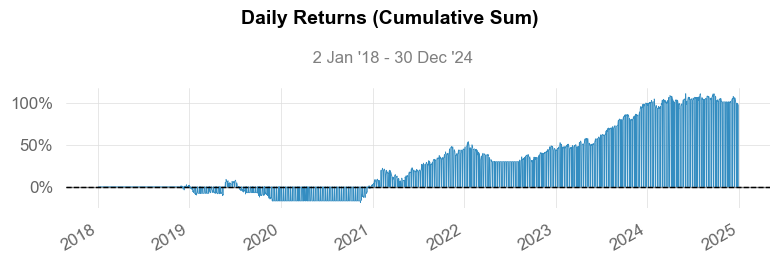

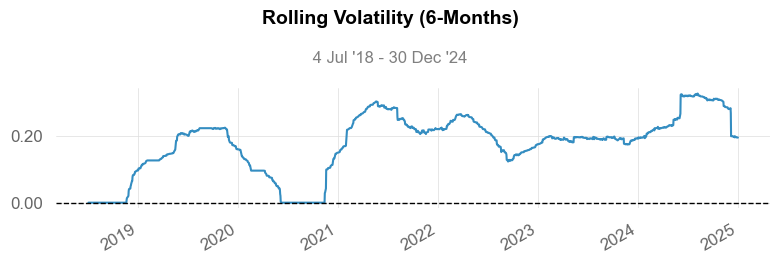

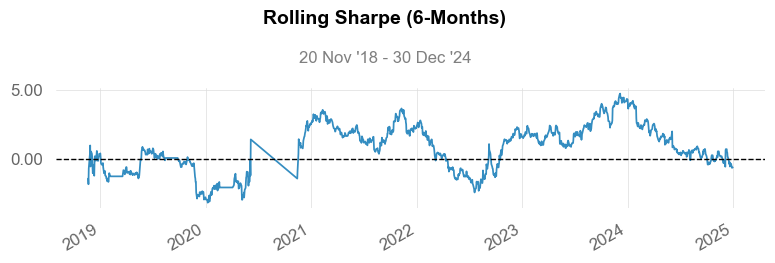

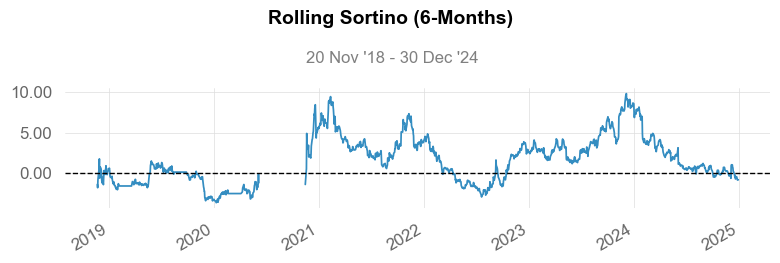

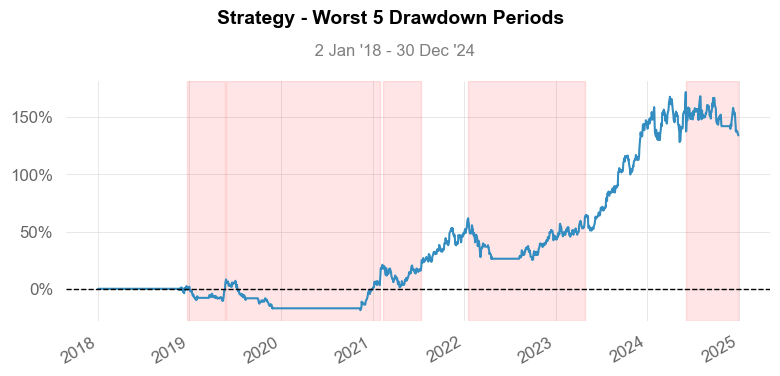

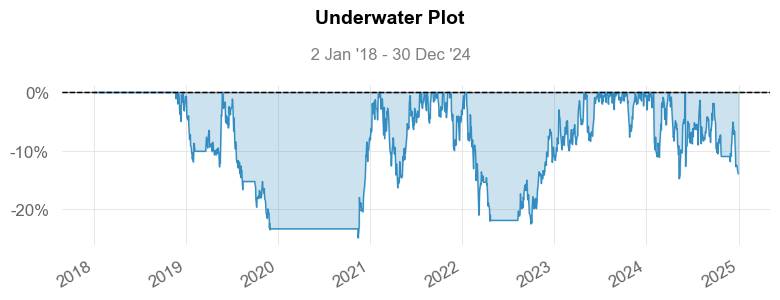

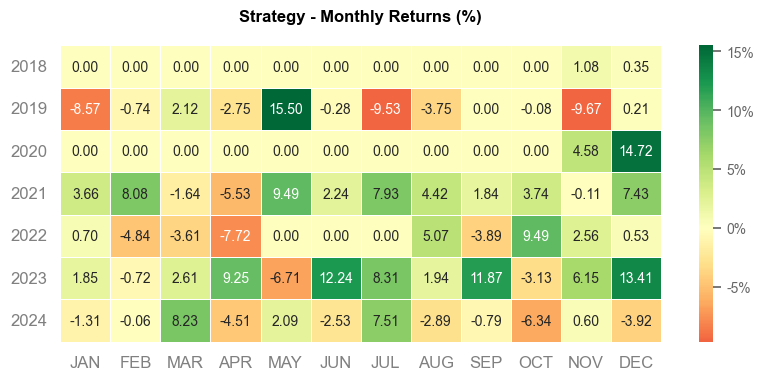

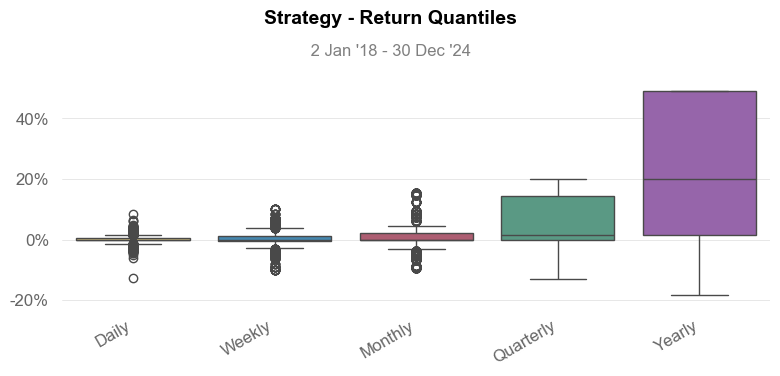

In [39]:
qs.reports.full(strategy_returns)

<div style="background-color:#e8f2ff; padding:16px; border-radius:8px;">

### Assignment 15C: Momentum Strategy on NIFTY (Long / Short – Always in Market)  

**Assignment Rules**

- Use **NIFTY index data**
- Compute **MACD**
- **Go Long (+1)** when **MACD > Signal Line**
  <br>
- **Go Short (−1)** when **MACD < Signal Line**
- Positions **flip between Long and Short** on signal crossover
- The strategy **remains always in the market** (no flat state)
- Avoid look-ahead bias

**Output Requirements**

- Plot **price chart**, **MACD**, and **position**
- Print **cumulative asset returns** and **cumulative strategy returns**
- Plot **cumulative asset vs strategy returns**
- Use **QuantStats** to generate performance metrics

</div>

In [40]:
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
import quantstats as qs
import warnings
warnings.filterwarnings("ignore")

In [42]:
start_date = "2020-01-01"
end_date = "2024-12-31"
df = yf.download("^NSEI", start_date, end_date)

df.index = pd.to_datetime(df.index)

[*********************100%***********************]  1 of 1 completed


In [44]:
ema_12 = df["Close"].ewm(span=12, adjust=False).mean()
ema_26 = df["Close"].ewm(span=26, adjust=False).mean()

df["MACD"] = ema_12 - ema_26
df["Signal_Line"] = df["MACD"].ewm(span=9, adjust=False).mean()

In [45]:
df["Signal"] = 0

df.loc[df["MACD"] > df["Signal_Line"], "Signal"] = 1
df.loc[df["MACD"] < df["Signal_Line"], "Signal"] = -1

In [46]:
df["Position"] = df["Signal"].shift(1)
df["Position"].fillna(0, inplace=True)

In [47]:
df["Asset_Return"] = df["Close"].pct_change()

df["Strategy_Return"] = df["Position"] * df["Asset_Return"]

In [48]:
df["Cum_Asset_Return"] = (1 + df["Asset_Return"]).cumprod()
df["Cum_Strategy_Return"] = (1 + df["Strategy_Return"]).cumprod()

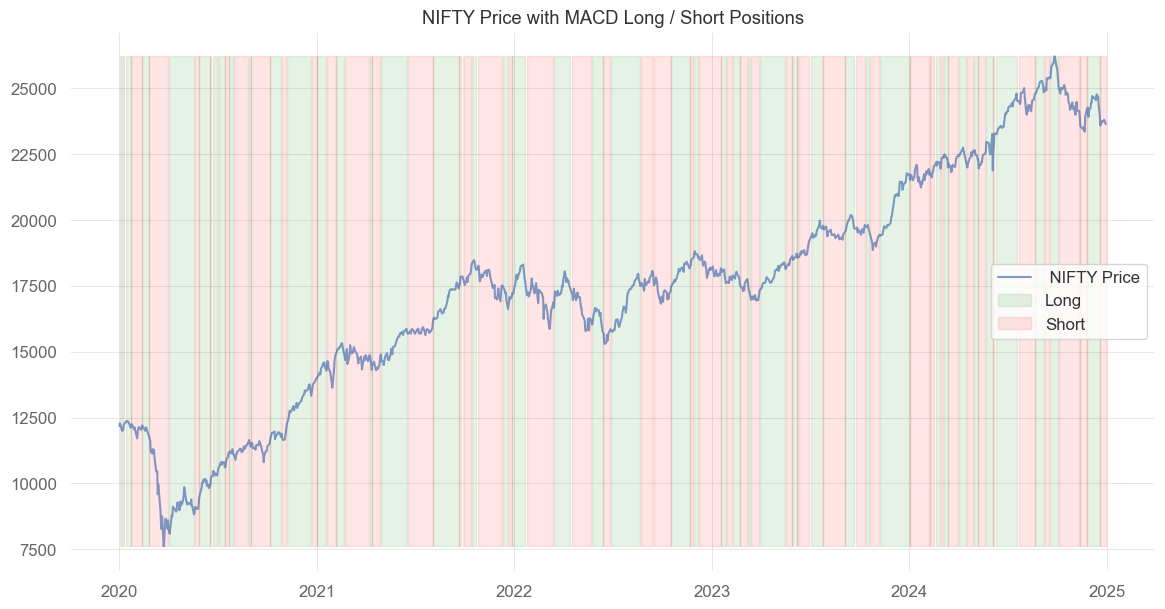

In [49]:
plt.figure(figsize=(14,7))

plt.plot(df["Close"], label=" NIFTY Price", alpha=0.7)

plt.fill_between(
    df.index,
    df["Close"].min(),
    df["Close"].max(),
    where=df["Position"] == 1,
    color="green",
    alpha=0.1,
    label="Long"
)

plt.fill_between(
    df.index,
    df["Close"].min(),
    df["Close"].max(),
    where=df["Position"] == -1,
    color="red",
    alpha=0.1,
    label="Short"
)
plt.title("NIFTY Price with MACD Long / Short Positions")
plt.legend()
plt.show()

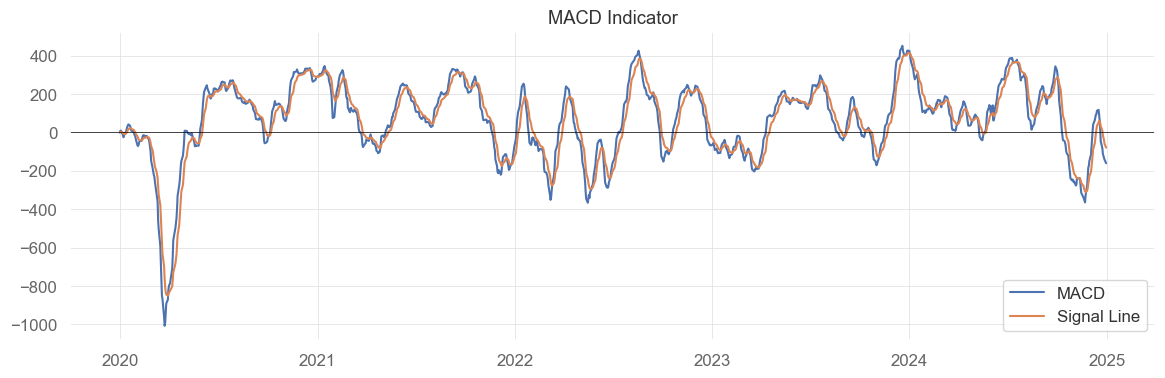

In [50]:
plt.figure(figsize=(14,4))

plt.plot(df["MACD"], label="MACD")
plt.plot(df["Signal_Line"], label= "Signal Line")

plt.axhline(0, color="black", linewidth=0.5)

plt.title("MACD Indicator")
plt.legend()
plt.show()

In [51]:
print("Cumulative Asset Return:", df["Cum_Asset_Return"].iloc[-1])
print("Cumulative Strategy Return:", df["Cum_Strategy_Return"].iloc[-1])

Cumulative Asset Return: 1.9408906538579878
Cumulative Strategy Return: 1.0519748941278482


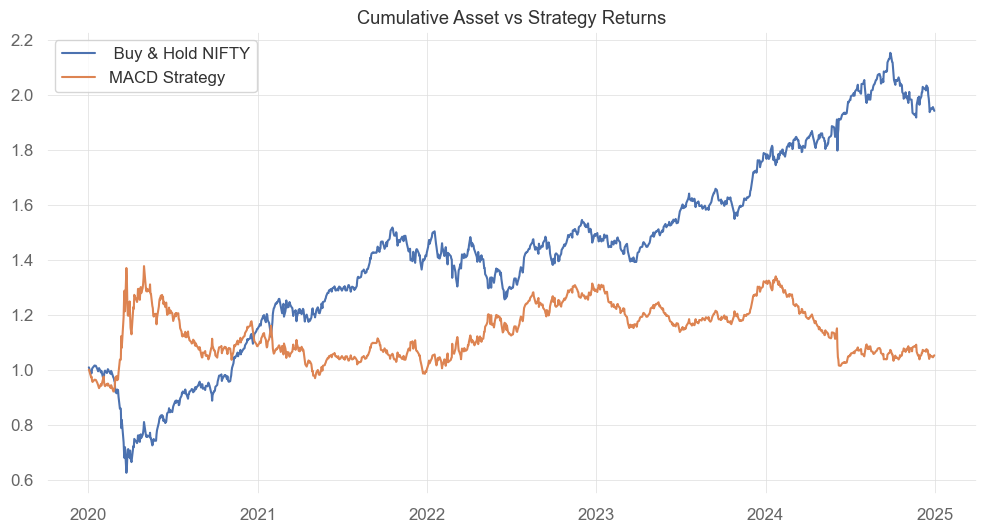

In [52]:
plt.figure(figsize=(12,6))
plt.plot(df["Cum_Asset_Return"], label=" Buy & Hold NIFTY")
plt.plot(df["Cum_Strategy_Return"], label="MACD Strategy")
plt.title("Cumulative Asset vs Strategy Returns")
plt.legend()
plt.show()

In [53]:
strategy_returns = df["Strategy_Return"].dropna()

                           Strategy
-------------------------  ----------
Start Period               2020-01-02
End Period                 2024-12-30
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          5.2%
CAGR﹪                     1.04%

Sharpe                     0.15
Prob. Sharpe Ratio         62.97%
Smart Sharpe               0.14
Sortino                    0.23
Smart Sortino              0.22
Sortino/√2                 0.16
Smart Sortino/√2           0.15
Omega                      1.03

Max Drawdown               -29.61%
Max DD Date                2021-05-04
Max DD Period Start        2020-05-04
Max DD Period End          2024-12-30
Longest DD Days            1702
Volatility (ann.)          19.14%
Calmar                     0.04
Skew                       1.44
Kurtosis                   18.54

Expected Daily %           0.0%
Expected Monthly %         0.08%
Expected Yearly %          1.02%
Kelly Criterion            1.45%
Risk of Ruin   

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-05-04,2021-05-04,2024-12-30,1702,-29.614843,-27.919463
2,2020-03-24,2020-04-03,2020-04-29,37,-17.598898,-15.866027
3,2020-01-03,2020-02-24,2020-03-06,64,-7.968643,-7.723577
4,2020-03-20,2020-03-20,2020-03-20,1,-5.832915,NaN
5,2020-03-13,2020-03-13,2020-03-13,1,-3.806508,NaN


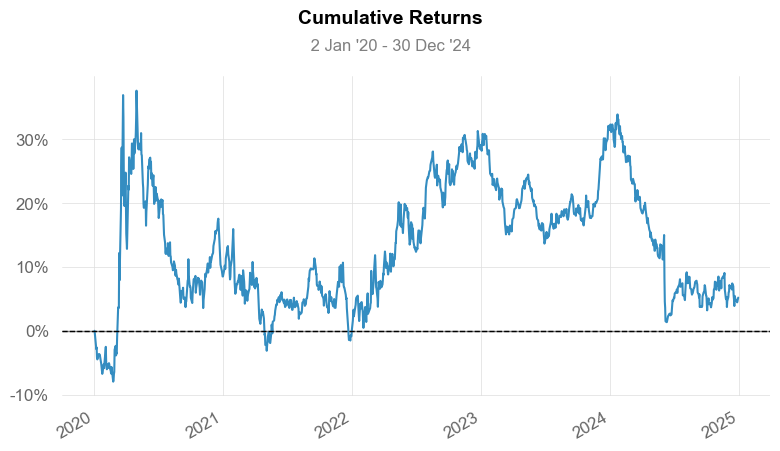

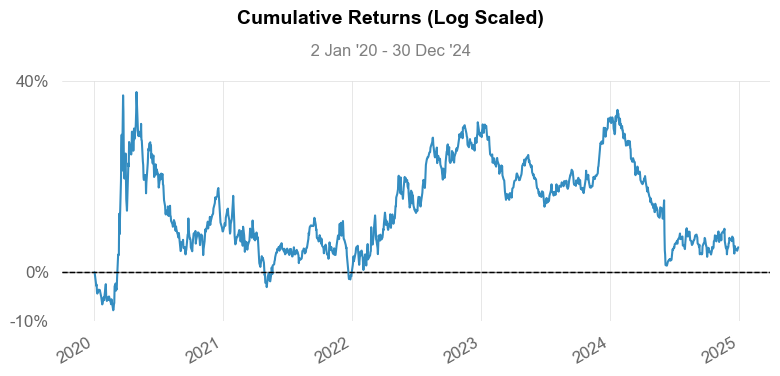

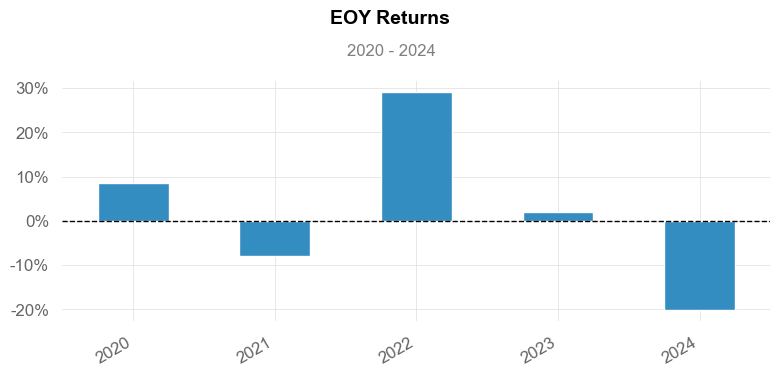

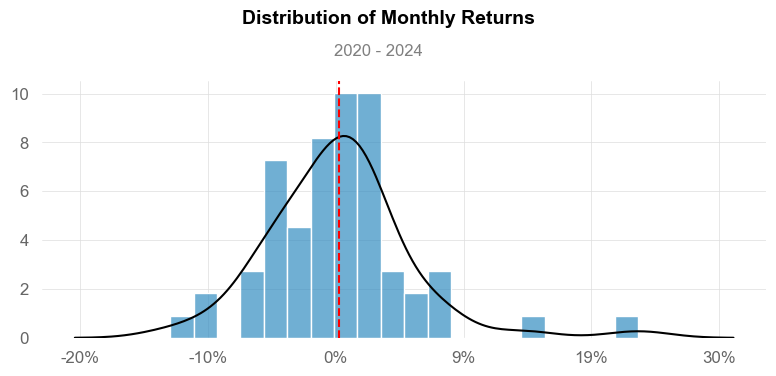

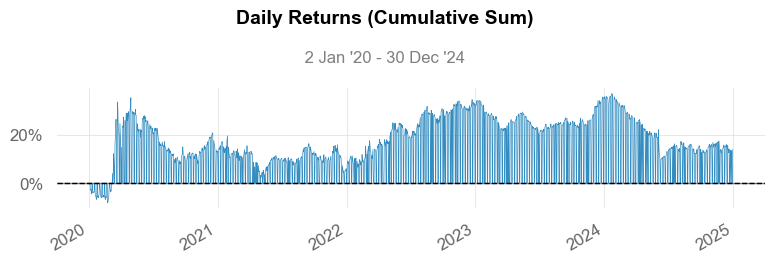

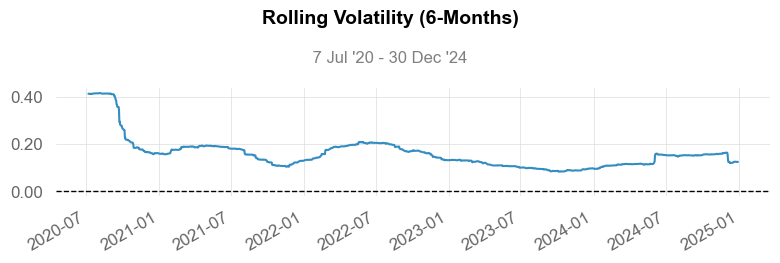

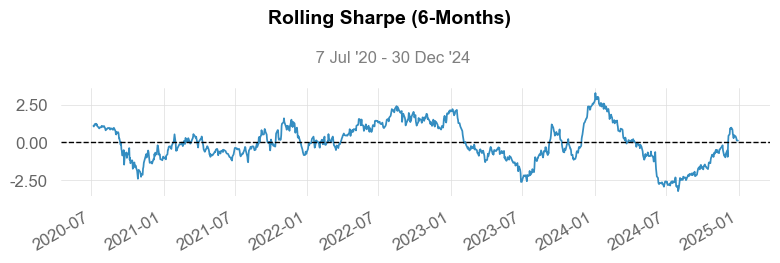

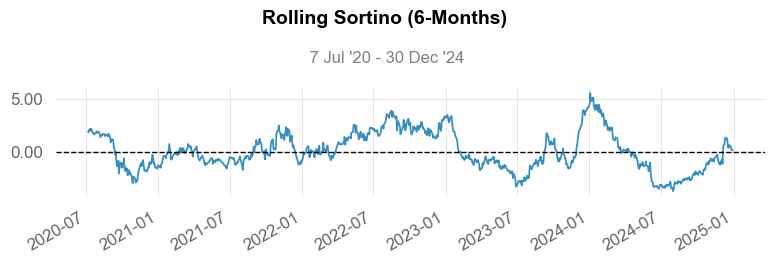

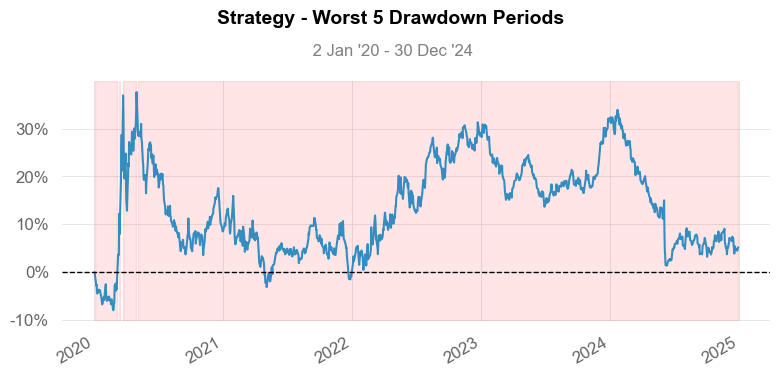

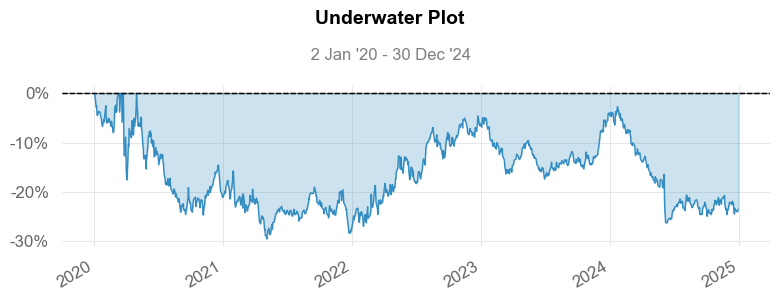

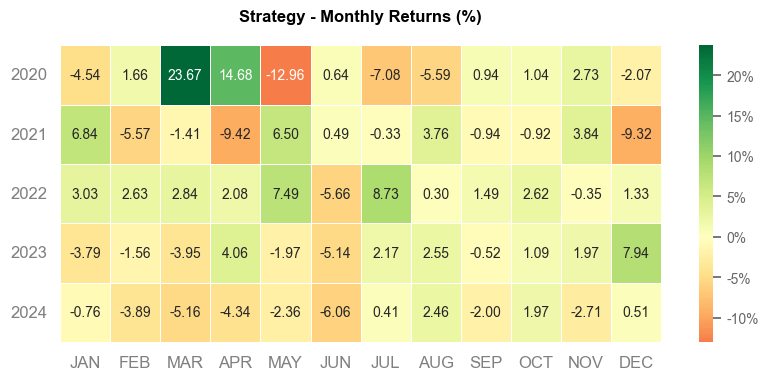

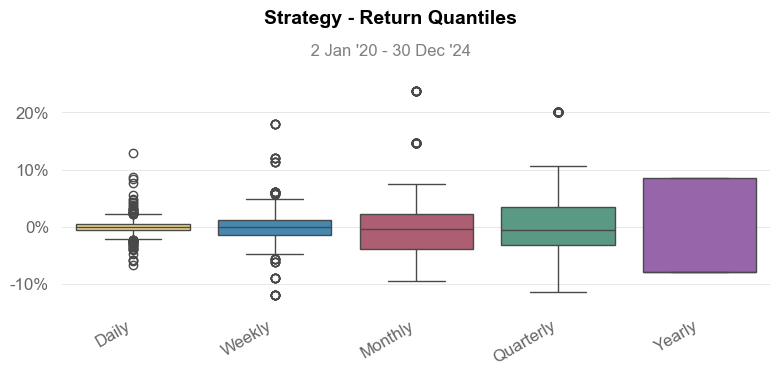

In [54]:
qs.reports.full(strategy_returns)

<div style="background-color:#e8f2ff; padding:16px; border-radius:8px;">

### Assignment 15D : Price Action Confirmation (Stocks)

**Assignment Rules**

- Download **Last 10 Years of Nifty Daily Close Data**
- Identify **Bullish Engulfing Candle**
- Candle must form **above a 200 MA**
- Filter out the results

</div>

In [3]:
import pandas as pd
import yfinance as yf
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = yf.download("^NSEI", period="10y")

[*********************100%***********************]  1 of 1 completed


In [5]:
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

df = df[['Open', 'High', 'Low', 'Close']].copy()

df['Close'] = df['Close'].astype(float)

In [6]:
df['MA200'] = df['Close'].rolling(200).mean()

In [7]:
df['Bullish_Engulfing'] = (
    (df['Close'].shift(1) < df['Open'].shift(1)) &  
    (df['Close'] > df['Open']) &                     
    (df['Close'] > df['MA200'])                      
)

In [8]:
signals = df[df['Bullish_Engulfing']].dropna()

signals.tail()

Price,Open,High,Low,Close,MA200,Bullish_Engulfing
Date,,,,,,
2025-12-18,25764.699219,25902.349609,25726.300781,25815.550781,24784.197051,True
2025-12-31,25971.050781,26187.949219,25969.000000,26129.599609,24932.919043,True
2026-01-02,26155.099609,26340.000000,26118.400391,26328.550781,24970.452549,True
2026-01-12,25669.050781,25813.150391,25473.400391,25790.250000,25064.108799,True
2026-01-14,25648.550781,25791.750000,25603.949219,25665.599609,25084.463301,True


<div style="background-color:#e8f2ff; padding:16px; border-radius:8px;">

### Assignment 15E: Price Action Confirmation – Bullish (Stocks)

<b>Assignment Rules</b>

- Download **Last 10 Years of Bank Nifty Daily Close Data**
- Identify a <b>Bullish Hammer Candle</b>
- Candle must form <b>above the 200 period EMA</b>
- Filter out the results

</div>


In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [15]:
df = yf.download("^NSEBANK", period="10y")


if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

df = df[['Open', 'High', 'Low', 'Close']].copy()


[*********************100%***********************]  1 of 1 completed


In [16]:
df['EMA200'] = df['Close'].ewm(span=200, adjust=False).mean()

In [17]:
body = abs(df['Close'] - df['Open'])
lower_wick = df[['Open', 'Close']].min(axis=1) - df['Low']
upper_wick = df['High'] - df[['Open', 'Close']].max(axis=1)


df['Bullish_Hammer'] = (
    (lower_wick >= 2 * body) &        
    (upper_wick <= body) &           
    (df['Close'] > df['EMA200'])      
)


In [18]:
signals = df[df['Bullish_Hammer']].dropna()
signals.tail(10)


Price,Open,High,Low,Close,EMA200,Bullish_Hammer
Date,,,,,,
2024-09-10,51328.300781,51366.000000,50958.250000,51272.300781,48712.520862,True
2024-10-15,51975.949219,52022.050781,51698.750000,51906.000000,49489.958184,True
2024-11-21,50625.000000,50652.148438,49787.101562,50372.898438,49901.662906,True
2025-02-06,50468.351562,50553.351562,50149.800781,50382.101562,50201.247038,True
2025-05-22,54875.898438,54996.101562,54576.601562,54941.300781,51132.823423,True
2025-07-01,57375.800781,57533.851562,57150.351562,57459.449219,52365.557341,True
2025-09-05,54308.050781,54308.050781,53719.550781,54114.550781,53590.279068,True
2025-09-18,55797.101562,55835.250000,55490.898438,55727.449219,53700.028100,True
2025-11-11,57962.300781,58187.351562,57594.250000,58138.148438,54638.988659,True


<div style="background-color:#e8f2ff; padding:16px; border-radius:8px;">

### Assignment 15F: Price Action Confirmation – Bearish (Stocks)

<b>Assignment Rules</b>

- Identify a <b>Bearish Engulfing Candle</b>
- Candle must form <b>below the 200 EMA</b>
- Filter out the results

</div>


In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [20]:
df = yf.download("^NSEI", period="10y")

[*********************100%***********************]  1 of 1 completed


In [21]:
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

df = df[['Open', 'High', 'Low', 'Close']].copy()

In [22]:
df['EMA200'] = df['Close'].ewm(span=200, adjust=False).mean()

In [24]:
df['Bearish_Engulfing'] = (
    (df['Close'].shift(1) > df['Open'].shift(1)) &    
    (df['Close'] < df['Open']) &                      
    (df['Open'] >= df['Close'].shift(1)) &            
    (df['Close'] <= df['Open'].shift(1)) &            
    (df['Close'] < df['EMA200'])                      
)

In [25]:
signals = df[df['Bearish_Engulfing']].dropna()
signals.tail(10)


Price,Open,High,Low,Close,EMA200,Bearish_Engulfing
Date,,,,,,
2019-08-13,11139.400391,11145.900391,10901.599609,10925.849609,11262.560664,True
2019-09-12,11058.299805,11081.750000,10964.950195,10982.799805,11210.402355,True
2020-06-24,10529.250000,10553.150391,10281.950195,10305.299805,10520.665480,True
2020-06-30,10382.599609,10401.049805,10267.349609,10302.099609,10512.858380,True
2022-03-03,16723.199219,16768.949219,16442.949219,16498.050781,16716.102052,True
2022-05-04,17096.599609,17132.849609,16623.949219,16677.599609,16864.691715,True
2022-06-01,16594.400391,16649.199219,16438.849609,16522.750000,16749.063884,True
2023-03-28,17031.750000,17061.750000,16913.750000,16951.699219,17521.226426,True
2024-12-20,23960.699219,24065.800781,23537.349609,23587.500000,23682.729949,True


<div style="background-color:#e8f2ff; padding:16px; border-radius:8px;">

### Assignment 15G: Buy and Hold (Multi-Asset Portfolio)

<b>Strategy Rules</b>

- Build a buy-and-hold portfolio using the following Yahoo Finance tickers (Last 10 yrs.):
  <br>
  <b>GLD</b> (Gold ETF),
  <b>SLV</b> (Silver ETF),
  <b>^NSEI</b> (NIFTY 50 Index),
  <b>QQQ</b> (NASDAQ 100 ETF),
  <b>SPY</b> (S&P 500 ETF)
- Enter all positions at the start of the test period
- Hold positions continuously with <b>no exits</b>
- Portfolio returns are driven purely by <b>long-term price movement</b>
- The strategy remains <b>fully invested</b> at all times

<b>Evaluate Buy and Hold Portfolio Performance</b>

- Plot the <b>cumulative portfolio equity curve</b>
- Evaluate <b>CAGR</b>, <b>volatility</b>, and <b>maximum drawdown</b>

</div>

In [72]:
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [78]:
start_date = "2016-01-01"
end_date = "2025-12-31"

tickers = ["GLD", "SLV", "^NSEI", "QQQ", "SPY"]

data = yf.download(tickers, start_date, end_date)["Close"]

data.index = pd.to_datetime(data.index)

[*********************100%***********************]  5 of 5 completed


In [79]:
returns = data.pct_change().dropna()

In [80]:
num_assets = len(tickers)
weights = [1 / num_assets] * num_assets

portfolio_returns = returns.dot(weights)

In [82]:
cumulative_portfolio = (1 + portfolio_returns).cumprod()

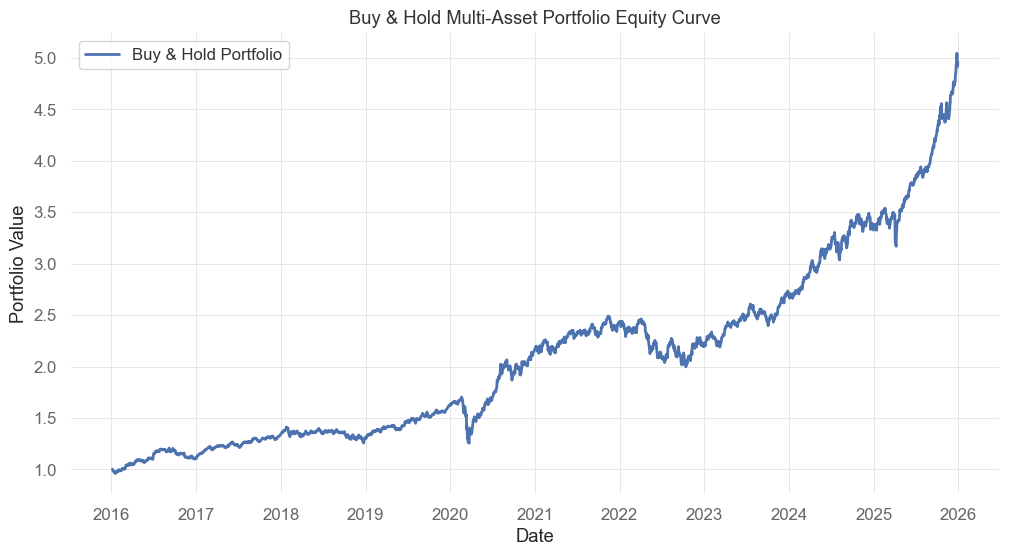

In [84]:
plt.figure(figsize=(12,6))

plt.plot(cumulative_portfolio, label="Buy & Hold Portfolio", linewidth=2)

plt.title("Buy & Hold Multi-Asset Portfolio Equity Curve")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

In [85]:
years  = (cumulative_portfolio.index[-1] - cumulative_portfolio.index[0]).days / 365

cagr = (cumulative_portfolio.iloc[-1] ** (1 / years)) -1

In [86]:
volatility = portfolio_returns.std() * (252 ** 0.5)

In [87]:
rolling_max = cumulative_portfolio.cummax()
drawdown = cumulative_portfolio / rolling_max -1
max_drawdown = drawdown.min()

In [88]:
print(f"CAGR: {cagr:.2%}")
print(f"Annualized Volatility: {volatility:.2%}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")

CAGR: 17.38%
Annualized Volatility: 13.01%
Maximum Drawdown: -26.30%
